# COVID-19 Dataset in Tensorflow 
## Hello, welcome to my notebook, in this notebook  we check the  covid-19 dataset and we will make the Tensorflow machine learning algorithms to find out relationships between people who died and survived the covid virus

# Before starting You should download [COVID-19 Dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset) 
# And try to reading this article: [Covid-19-visualization](https://www.kaggle.com/code/kaanxtr/covid-19-visualization-and-machine-learning#Conclusion) (we use same code for cleaning and organizing the data)
## let's beginning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Covid Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97



# As mentioned in the data, the values  97, 98 and 99 are our null values. In the feature, we will combine them into a single value.

In [5]:
for i in df.columns:
    print(df[i].value_counts(),"\n")

2    662903
1    385672
Name: USMER, dtype: int64 

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64 

1    525064
2    523511
Name: SEX, dtype: int64 

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64 

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64 

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64 

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64 

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64 

97    523511
2     51317

In [6]:
df["ALIVE"]=[1 if i=="9999-99-99" else 0 for i in df["DATE_DIED"]]

In [7]:
df.drop("DATE_DIED",axis=1,inplace=True)

In [8]:
df['CLASIFFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

### Values between 1 and 3 in the CLASIFFICATION_FINAL feature are people who have been infected with the covid virus before. Those that are greater than these values are people who have been tested and have negative results or whose results are unknown.
We assign a value of 1 to our data for people who have previously been infected with the corona virus, and 0 to people who have not been infected with this virus or whose result is unknown.

In [9]:
df["INFECTED"]=[1 if each<4 else 0 for each in df["CLASIFFICATION_FINAL"]]
df.drop("CLASIFFICATION_FINAL",axis=1,inplace=True)

We make a list of column names that contain null values ​​in the data and make the data logical

In [10]:
null_or_non_zero_list=["USMER","SEX","PATIENT_TYPE","INTUBED","PNEUMONIA","PREGNANT","DIABETES","COPD","ASTHMA","INMSUPR","HIPERTENSION","OTHER_DISEASE","CARDIOVASCULAR","OBESITY","RENAL_CHRONIC","TOBACCO","ICU"]
for each in null_or_non_zero_list:
    # We set the data with values of 2 to 0 to ensure that our data is logical. Sex feature => 0 = Male, 1=Female
    df[each]=df[each].replace(2,0)
    # we set the null values to 98
    df[each]=df[each].replace([97,99],98) 

Now that we have assigned our null values, let's find out how many of these values ​​are in which future

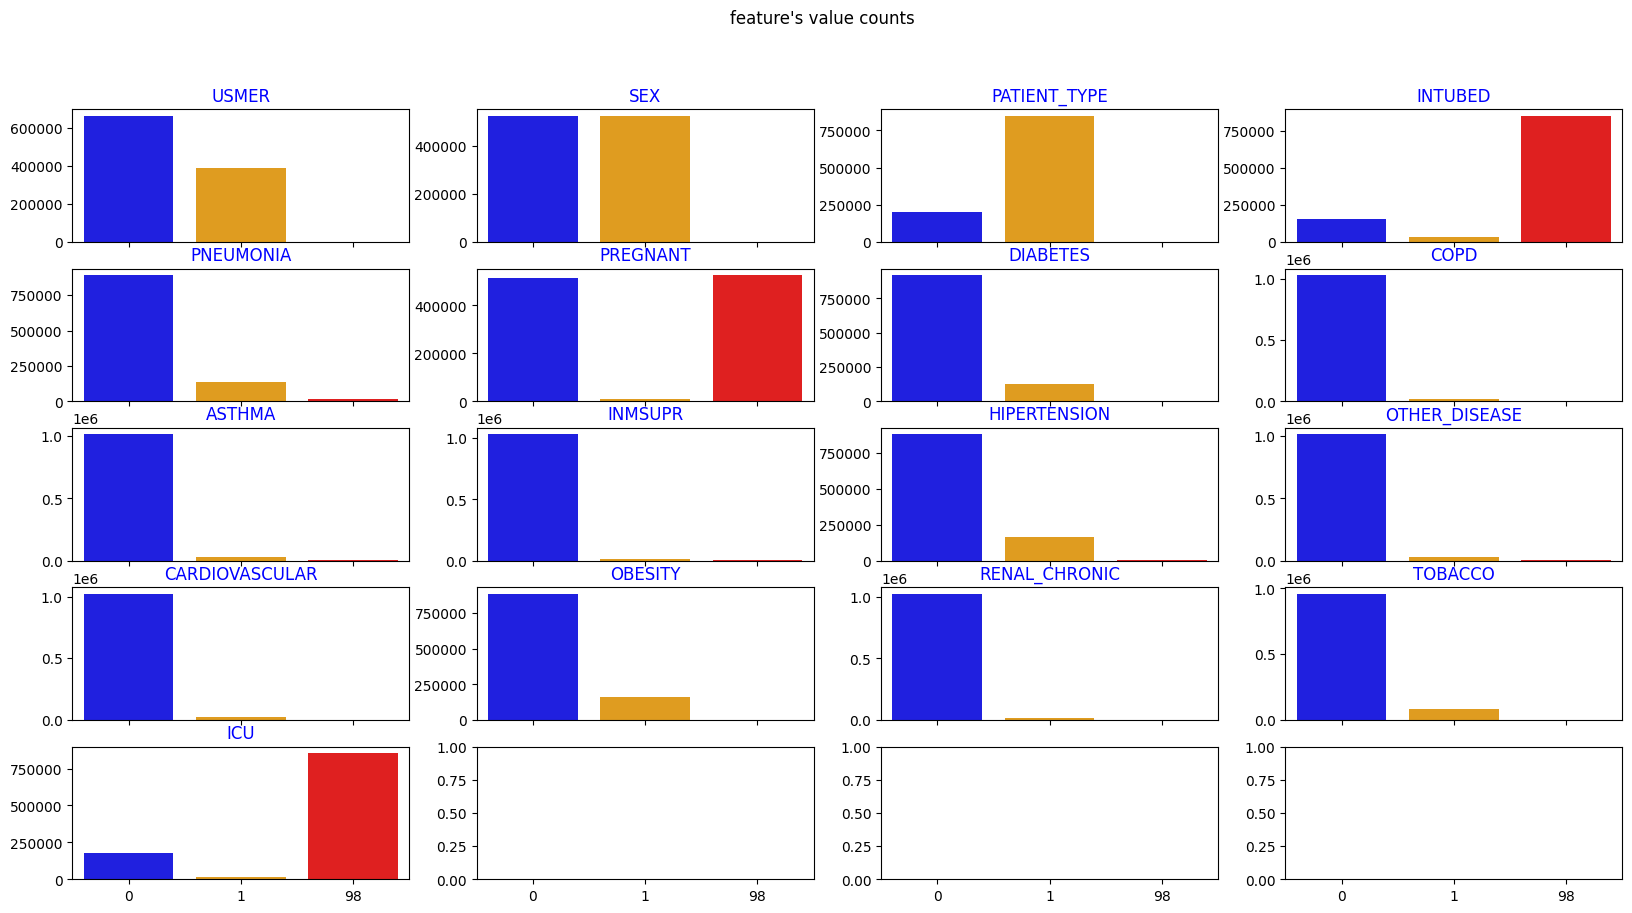

In [11]:
fig,axes=plt.subplots(5,4,sharex=True,figsize=(20,10))
fig.suptitle("feature's value counts")

a=0
b=0
for each in null_or_non_zero_list: 
    sns.barplot(ax=axes[a][b],x=df[each].value_counts().index,y=df[each].value_counts().values,palette=["blue","orange","red"])
    axes[a][b].set_title(each,color="blue")
    b+=1
    if b>3:
        a+=1
        b=0

As seen in the graph, there are 3 features(INTUBED,PREGNANT and ICU) with more null(98) values. We don't want to lose them. So we will need to find out which class these null values belong to.
Of course, before we do all these, we will have to look at the values of the feature we will predict and determine which one is more weighted.

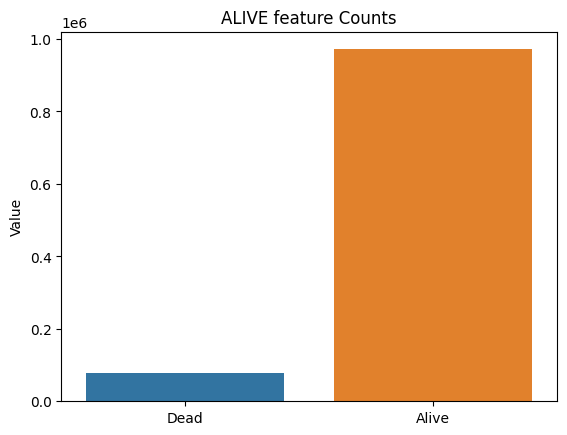

In [12]:
plt.figure()
sns.barplot(x=df.ALIVE.value_counts().index,y=df.ALIVE.value_counts().values).set(title="ALIVE feature Counts",xticklabels=(["Dead","Alive"]),ylabel="Value")
plt.show()

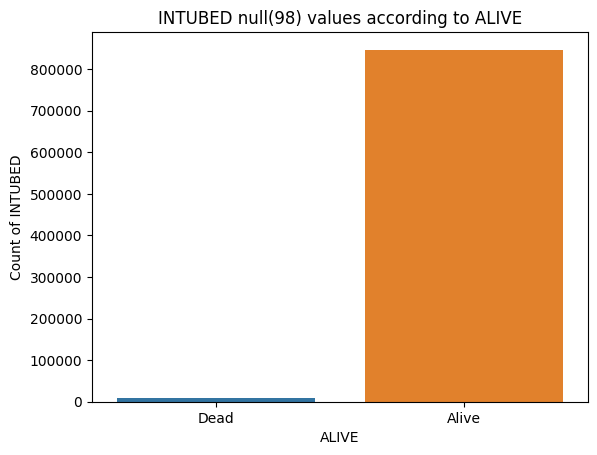

In [13]:
plt.figure()
bar=sns.barplot(x=df.ALIVE[(df.INTUBED==98)].value_counts().index,y=df.ALIVE[(df.INTUBED==98)].value_counts().values)
bar.set(title="INTUBED null(98) values according to ALIVE",xticklabels=(["Dead","Alive"]),ylabel="Count of INTUBED",xlabel="ALIVE")
plt.show()


This feature is predominantly survivors and the number of nulls is high, it cannot positively affect our data, so we can remove it altogether

In [14]:
df.drop(columns=["INTUBED"],inplace=True)
null_or_non_zero_list.remove("INTUBED")

### We made our first feature. Let's move on to the next pregnancy future.
### First of all, let's equate the values that are male and null with pregnant values in our data to 0. Because a male cannot get pregnant. :)
We can't relate to other features with female pregnant feature and null values in our data. At the same time, we can remove these data from our data because they are few in number.


In [15]:
print(df.PREGNANT[(df.SEX==0)&(df.PREGNANT==98)].value_counts())
df.PREGNANT[(df["SEX"]==0)&(df.PREGNANT==98)]=0

98    523511
Name: PREGNANT, dtype: int64


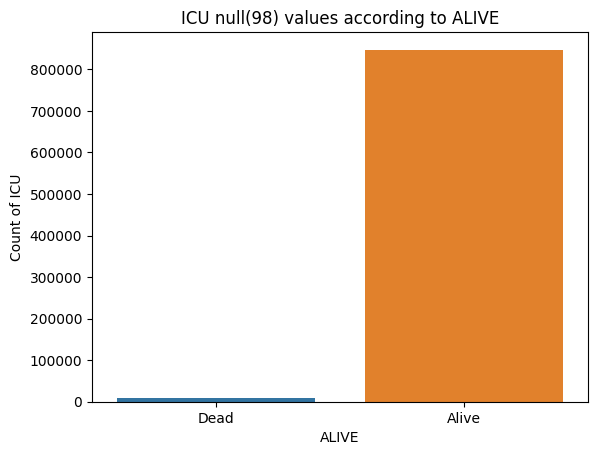

In [16]:
plt.figure()
bar=sns.barplot(x=df.ALIVE[(df.ICU==98)].value_counts().index,y=df.ALIVE[(df.ICU==98)].value_counts().values)
bar.set(title="ICU null(98) values ​​according to ALIVE",xticklabels=(["Dead","Alive"]),ylabel="Count of ICU",xlabel="ALIVE")
plt.show()

In [17]:
df.drop(columns=["ICU"],inplace=True)
null_or_non_zero_list.remove("ICU")

Now that we're done with large nulls, let's get rid of low-value nulls

In [18]:
for i in null_or_non_zero_list:
    df.drop(df[df[i]==98].index,inplace=True)
df.reset_index(inplace=True,drop=True)

# Data Visualization
Let's compare some features by survival

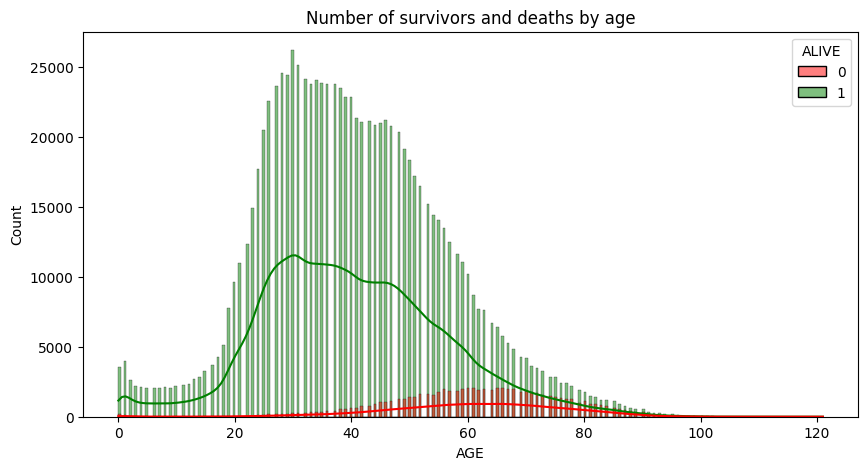

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x=df.AGE,hue=df.ALIVE,legend=True,palette=["red","green"],kde=True).set(title="Number of survivors and deaths by age")
plt.show()


Since the data is unbalanced, the number of survivors is higher, but we can understand from that the average age of the deceased is higher than the survivors.


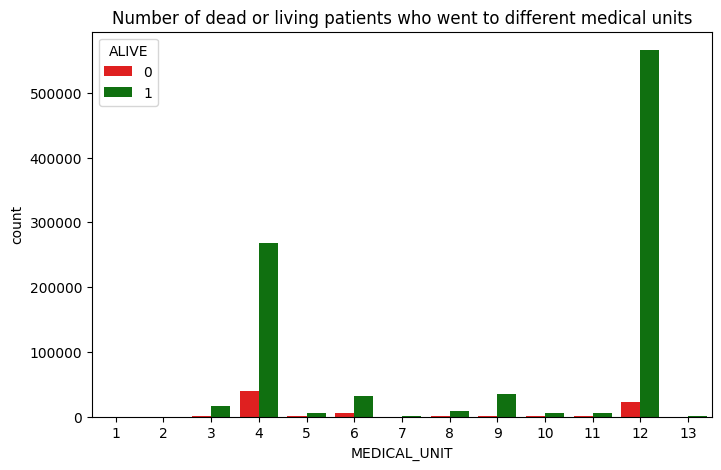

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.MEDICAL_UNIT,hue=df.ALIVE,palette=["red","green"]).set(title="Number of dead or living patients who went to different medical units")
plt.show()


As can be seen from the patients who went to medical units 4 and 12, as the medical unit improves, survival rates increase and deaths decrease.(etc. 4= Cottage hospital, 12= Hospital)


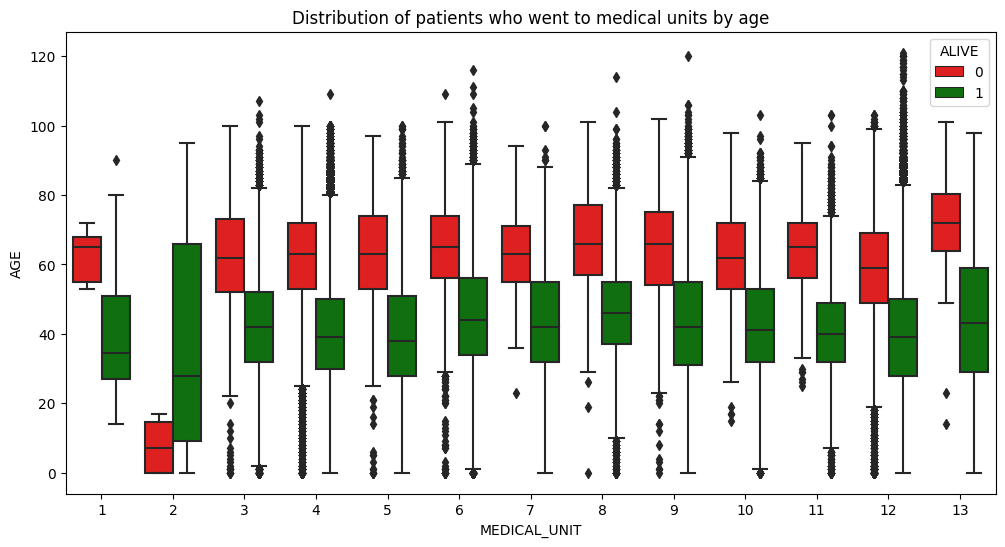

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.MEDICAL_UNIT,y=df.AGE,hue=df.ALIVE,palette=["red","green"]).set(title="Distribution of patients who went to medical units by age")
plt.show()


The median values ​​of people who died and lived, who went to different medical units, do not change that much. Here we see that survival is proportional to age.


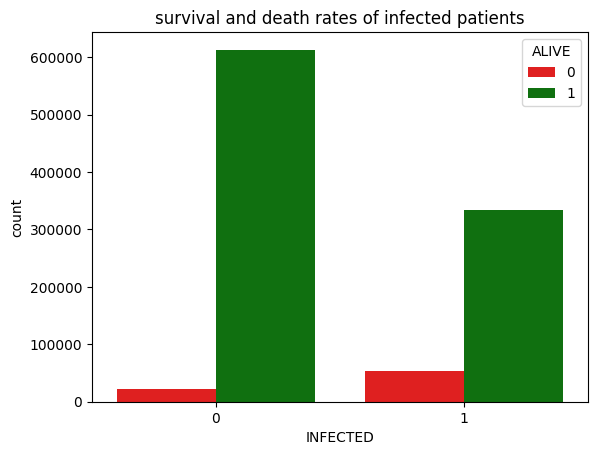

In [22]:
plt.figure()
sns.countplot(x=df.INFECTED,hue=df.ALIVE,palette=["red","green"]).set(title="survival and death rates of infected patients")
plt.show()


In this graph, we see that the chance of dying of an infected person is higher than a healthy person

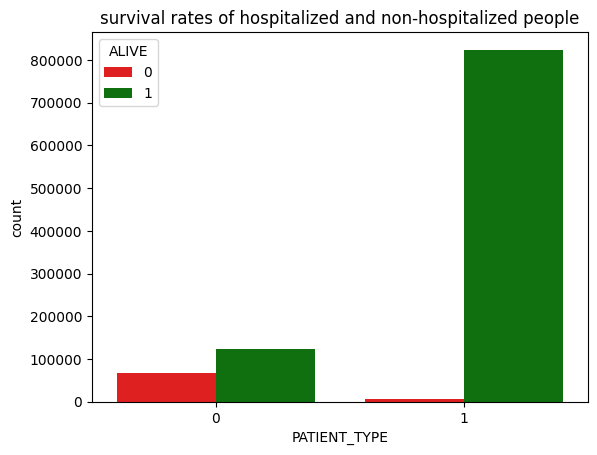

In [23]:
plt.figure()
sns.countplot(x=df.PATIENT_TYPE,hue=df.ALIVE,palette=["red","green"]).set(title="survival rates of hospitalized and non-hospitalized people")
plt.show()


People who are hospitalized have a higher chance of survival

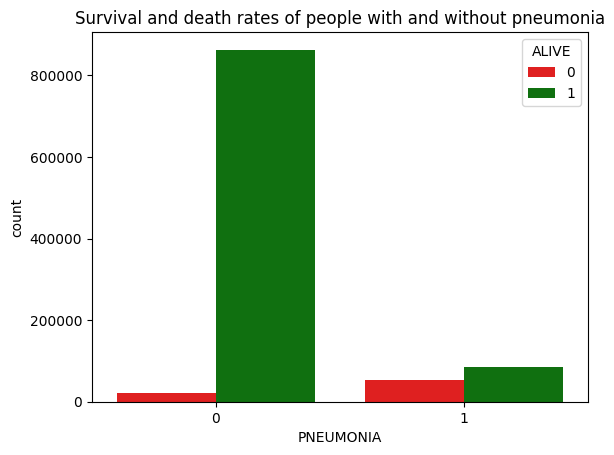

In [24]:
plt.figure()
sns.countplot(x=df.PNEUMONIA,hue=df.ALIVE,palette=["red","green"]).set(title="Survival and death rates of people with and without pneumonia")
plt.show()


People with pneumonia have an average chance of dying with an older person

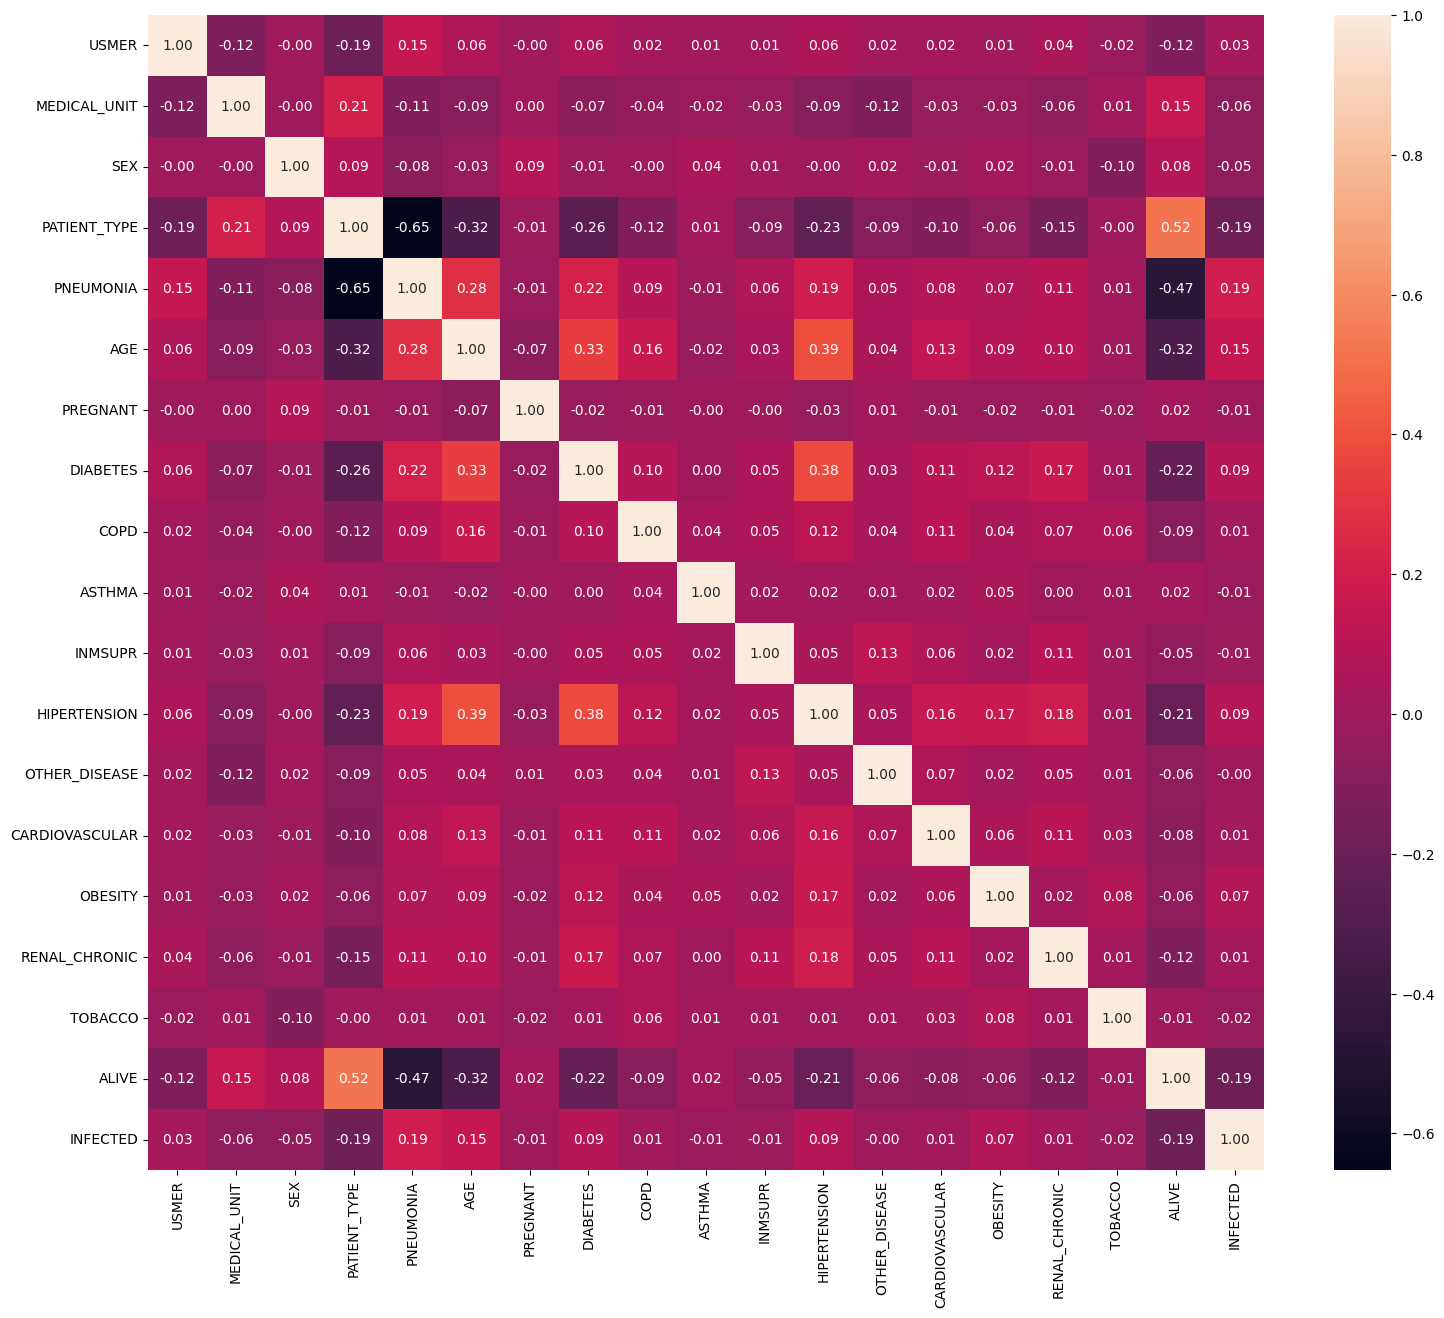

In [25]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.show()


# Scaling Data
There are 2 features (MEDICAL_UNIT and AGE) without logic in our data. Let's normalize them and prepare our data.

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
"""normalize_list=["AGE","MEDICAL_UNIT"]
for i in normalize_list:
    data[i]=(data[i]-np.min(data[i]))/(np.max(data[i])-np.min(data[i]))"""
  
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))
df.MEDICAL_UNIT=scaler.fit_transform(df.MEDICAL_UNIT.values.reshape(-1,1))


The robustscaler function makes better distinctions to the machine learning algorithm than the normalization above. You can try.



# Separating labels and features

In [34]:
X=df.drop(columns="ALIVE")
y=df.ALIVE

# Train test splits and get balance the data

Two different methods can be used here to balance the data. Either we multiply those with alive values ​​of 0, or we balance those with a alive value of 1 with 0.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)